In [1]:
# Import libraries
'''
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
'''

# Pretty display for notebooks
'''
%matplotlib inline
'''

# Allows the use of display() for DataFrames
from IPython.display import display 

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")
weather = pd.read_csv("../asset/weather.csv")
key = pd.read_csv("../asset/key.csv")
submission_example = pd.read_csv("../asset/sampleSubmission.csv")

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("weather  data : ", weather.shape)
print("key  data : ", key.shape)
print("submission  data : ", submission_example.shape)

import pickle
import costum_functions as cf

slack_url = pickle.load(open('slackUrl.pickle', 'rb'))
slack_url

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_weather = weather.copy()
df_key = key.copy()
df_test = test.copy()

Train data :  (4617600, 4)
Test  data :  (526917, 3)
weather  data :  (20517, 20)
key  data :  (45, 2)
submission  data :  (526917, 2)


In [2]:
cf.sendSlackDm(slack_url, "worked")

In [9]:
df_train.tail(5)
print(len(df_train))

4617600


In [31]:
df_train.tail()

,date,store_nbr,item_nbr,units
4617595,2014-10-31,45,107,0
4617596,2014-10-31,45,108,0
4617597,2014-10-31,45,109,0
4617598,2014-10-31,45,110,0
4617599,2014-10-31,45,111,0


In [23]:
df_key.tail(5)

,store_nbr,station_nbr
40,41,12
41,42,14
42,43,11
43,44,12
44,45,16


In [24]:
df_weather.tail(5)

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20512,16,2014-10-31,53,34,44,M,35,41,21,0,-,-,,M,0.00,29.90,29.99,4.5,03,5.3
20513,17,2014-10-31,59,34,47,M,32,41,18,0,-,-,RA,0.0,0.00,29.72,30.39,9.2,01,9.3
20514,18,2014-10-31,67,49,58,-4,40,50,7,0,0644,1738,,0.0,0.00,29.78,30.28,10.6,36,11.2
20515,19,2014-10-31,45,33,39,-6,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9
20516,20,2014-10-31,68,50,59,M,39,50,6,0,-,-,,0.0,0.00,29.57,30.27,10.5,36,11.2


In [2]:
df_test.tail(5)

,date,store_nbr,item_nbr
526912,2014-10-26,45,107
526913,2014-10-26,45,108
526914,2014-10-26,45,109
526915,2014-10-26,45,110
526916,2014-10-26,45,111


In [70]:
test_date_count = pd.DataFrame(df_test.groupby("date").size(), columns=["count"])
test_date_count.tail()

,count
date,
2014-10-22,555
2014-10-23,555
2014-10-24,555
2014-10-25,555
2014-10-26,555


In [10]:
len(df_weather)

20517

In [69]:
weather_date_count = pd.DataFrame(df_weather.groupby("date").size(), columns=["count"])
weather_date_count.tail()

,count
date,
2014-10-27,20
2014-10-28,20
2014-10-29,20
2014-10-30,20
2014-10-31,20


In [68]:
weather_station_count = pd.DataFrame(df_weather.groupby("station_nbr").size(), columns=["count"])
weather_station_count.head()

,count
station_nbr,
1,1035
2,1035
3,1035
4,1035
5,852


In [18]:
df_key.tail()

,store_nbr,station_nbr
40,41,12
41,42,14
42,43,11
43,44,12
44,45,16


In [27]:
df_key.index[df_key['station_nbr'] == 5]
# df_key.index[df_key['station_nbr'] == 5].tolist()

Int64Index([34], dtype='int64')

In [25]:
df_key.sort_values(by=["station_nbr"])
# station_nbr 5에 해당하는 store_nbr은 35가 유일

,store_nbr,station_nbr
0,1,1
15,16,2
28,29,3
20,21,3
32,33,3
7,8,4
34,35,5
12,13,6
6,7,6
2,3,7


In [30]:
df_weather.index[df_weather["station_nbr"] == 5]

Int64Index([ 2892,  2912,  2932,  2952,  2972,  2992,  3012,  3032,  3052,
             3072,
            ...
            20321, 20341, 20361, 20381, 20401, 20421, 20441, 20461, 20481,
            20501],
           dtype='int64', length=852)

In [67]:
train_store1 = df_train[df_train["store_nbr"]==1]
train_store1.tail()

,date,store_nbr,item_nbr,units
4612711,2014-10-31,1,107,0
4612712,2014-10-31,1,108,0
4612713,2014-10-31,1,109,0
4612714,2014-10-31,1,110,0
4612715,2014-10-31,1,111,0


In [66]:
train_store1_item1 = train_store1[train_store1["item_nbr"]==1]
train_store1_item1.tail()

,date,store_nbr,item_nbr,units
4592625,2014-10-27,1,1,0
4597620,2014-10-28,1,1,0
4602615,2014-10-29,1,1,0
4607610,2014-10-30,1,1,0
4612605,2014-10-31,1,1,0


In [ ]:
month_train_store1_item1 = train_store1_item1("units")

In [54]:
train_store1_item1.tail()

,date,store_nbr,item_nbr,units
4592625,20141027,1,1,0
4597620,20141028,1,1,0
4602615,20141029,1,1,0
4607610,20141030,1,1,0
4612605,20141031,1,1,0


In [3]:
df_train_with_station_nbr = df_train.merge(df_key, on=["store_nbr"], how="inner")
df_train_with_station_nbr.tail()

,date,store_nbr,item_nbr,units,station_nbr
4617595,2014-10-31,35,107,0,5
4617596,2014-10-31,35,108,0,5
4617597,2014-10-31,35,109,0,5
4617598,2014-10-31,35,110,0,5
4617599,2014-10-31,35,111,0,5


In [4]:
total = df_train_with_station_nbr.merge(df_weather, on=["date","station_nbr"], how="inner")

In [5]:
total.tail()

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
4617595,2014-10-31,35,107,0,5,M,M,M,M,37,...,0616,1640,,M,M,M,30.01,10.8,05,M
4617596,2014-10-31,35,108,0,5,M,M,M,M,37,...,0616,1640,,M,M,M,30.01,10.8,05,M
4617597,2014-10-31,35,109,0,5,M,M,M,M,37,...,0616,1640,,M,M,M,30.01,10.8,05,M
4617598,2014-10-31,35,110,0,5,M,M,M,M,37,...,0616,1640,,M,M,M,30.01,10.8,05,M
4617599,2014-10-31,35,111,0,5,M,M,M,M,37,...,0616,1640,,M,M,M,30.01,10.8,05,M


In [6]:
total["date"] = total["date"].apply(cf.dateToNumeric)

In [7]:
total[total[]]

SyntaxError: invalid syntax (<ipython-input-7-5626c6ca80b6>, line 1)

In [8]:
total_nonzero = total[total["units"]!=0]
total_nonzero.tail()

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
4617332,20141029,35,66,14,5,M,M,M,M,55,...,0613,1643,,M,M,M,29.87,8.2,23,M
4617393,20141030,35,16,16,5,M,M,M,M,38,...,0615,1641,,M,M,M,29.95,8.3,30,M
4617443,20141030,35,66,6,5,M,M,M,M,38,...,0615,1641,,M,M,M,29.95,8.3,30,M
4617504,20141031,35,16,18,5,M,M,M,M,37,...,0616,1640,,M,M,M,30.01,10.8,05,M
4617554,20141031,35,66,10,5,M,M,M,M,37,...,0616,1640,,M,M,M,30.01,10.8,05,M


In [283]:
A1 = pd.DataFrame(total_nonzero[total_nonzero["item_nbr"]==1].groupby("units").size(), columns=["1"])
A1

,1
units,
1,104
2,84
3,43
4,24
5,26
6,10
7,8
8,1
9,3


In [290]:
total_nonzero_item1 = total_nonzero[total_nonzero["item_nbr"]==1]
total_nonzero_item1.tail()

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
4406256,20140809,36,1,3,18,102,81,92,5,68,...,0546,1920,,0.0,0.00,29.42,29.91,6.7,18,9.7
4406478,20140811,36,1,4,18,98,81,90,3,66,...,0548,1918,,0.0,0.00,29.49,29.99,6.3,02,7.3
4406700,20140813,36,1,3,18,95,70,83,-4,59,...,0549,1916,,0.0,0.00,29.52,30.03,5.7,08,6.5
4406811,20140821,36,1,1,18,99,78,89,3,69,...,0555,1907,,0.0,0.00,29.46,29.95,13.6,18,14.2
4407033,20140823,36,1,1,18,98,79,89,4,65,...,0556,1905,,0.0,0.00,29.41,29.92,9.7,17,10.6


In [323]:
total_nonzero_item9 = total_nonzero[total_nonzero["item_nbr"]==9]
total_nonzero_item9.tail()

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
4522592,20141027,39,9,13,8,86,61,74,M,64,...,-,-,HZ,M,0.00,29.55,M,6.3,18,6.5
4522703,20141028,39,9,6,8,85,62,74,M,66,...,-,-,BR,M,0.00,29.63,M,0.9,18,1.1
4522814,20141029,39,9,11,8,77,64,71,M,66,...,-,-,BR,M,0.00,29.74,M,2.4,01,2.8
4522925,20141030,39,9,6,8,82,59,71,M,60,...,-,-,BR HZ,M,0.00,29.74,M,0.3,11,0.2
4523036,20141031,39,9,12,8,78,55,67,M,M,...,-,-,RA,M,T,29.82,M,M,M,5.1


In [307]:
total_nonzero_item["tavg"][total_nonzero_item1["tavg"]!="M"] = total_nonzero_item1["tavg"][total_nonzero_item1["tavg"]!="M"].astype("int")

In [329]:
total_nonzero_item9 = total_nonzero_item9[total_nonzero_item9["snowfall"]!="M"]

In [337]:
total_nonzero_item9[["tavg","tmax","tmin"]] = total_nonzero_item9[["tavg","tmax","tmin"]].astype("int")

TypeError: can't multiply sequence by non-int of type 'float'

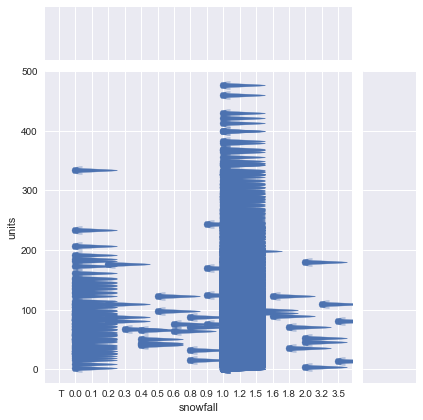

In [340]:
sns.jointplot(x=total_nonzero_item9["snowfall"], y=total_nonzero_item9["units"])

In [342]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [344]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfY = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfY], axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


<function matplotlib.pyplot.show>

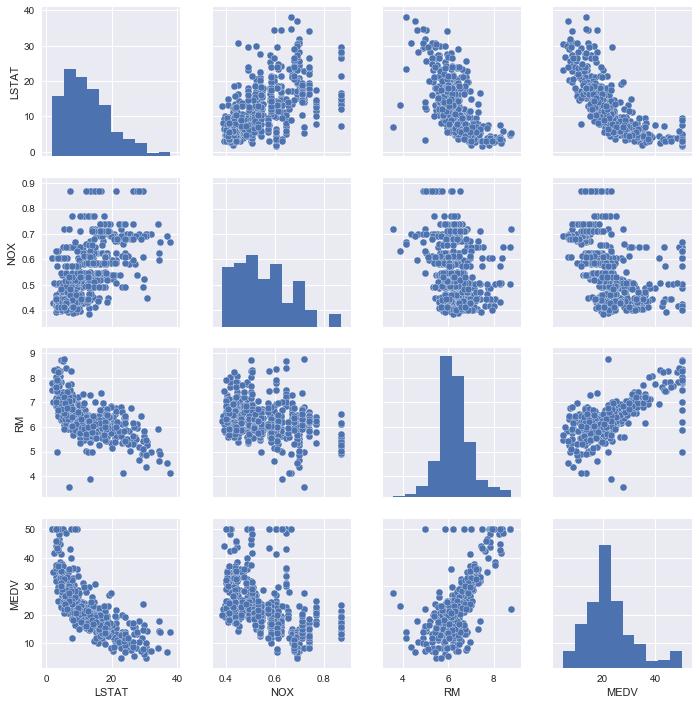

In [345]:
cols = ["LSTAT","NOX","RM","MEDV"]
sns.pairplot(df[cols])
plt.show

In [319]:
total_nonzero_item1_1 = total_nonzero_item1[total_nonzero_item1["depart"]!="M"]
total_nonzero_item1_1.tail()

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
4406256,20140809,36,1,3,18,102,81,92,5,68,...,0546,1920,,0.0,0.00,29.42,29.91,6.7,18,9.7
4406478,20140811,36,1,4,18,98,81,90,3,66,...,0548,1918,,0.0,0.00,29.49,29.99,6.3,02,7.3
4406700,20140813,36,1,3,18,95,70,83,-4,59,...,0549,1916,,0.0,0.00,29.52,30.03,5.7,08,6.5
4406811,20140821,36,1,1,18,99,78,89,3,69,...,0555,1907,,0.0,0.00,29.46,29.95,13.6,18,14.2
4407033,20140823,36,1,1,18,98,79,89,4,65,...,0556,1905,,0.0,0.00,29.41,29.92,9.7,17,10.6


In [321]:
total_nonzero_item1_1["depart"] = total_nonzero_item1_1["depart"].astype("int")

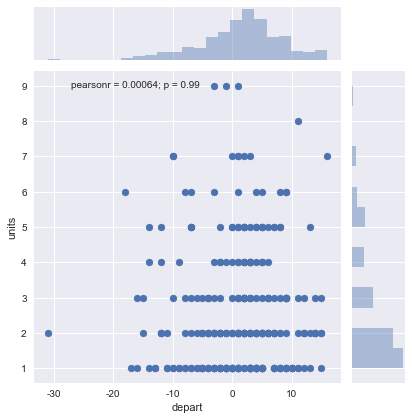

In [322]:
sns.set()
sns.jointplot(x=total_nonzero_item1_1["depart"], y=total_nonzero_item1_1["units"])

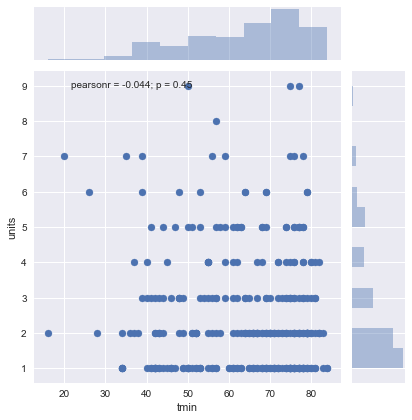

In [308]:
sns.jointplot(x=total_nonzero_item1["tmin"], y=total_nonzero_item1["units"])

In [9]:
total_units = total.groupby("item_nbr").units.agg(['sum','max','mean'])
total_units

,sum,max,mean
item_nbr,,,
1,778,9,0.018702
2,3269,15,0.078582
3,675,12,0.016226
4,348,7,0.008365
5,846662,5568,20.352452
6,41398,250,0.995144
7,721,6,0.017332
8,30345,184,0.729447
9,916615,503,22.034014


In [16]:
total_units.to_excel("total_units.xlsx")

In [221]:
df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, np.nan]],columns=['A', 'B', 'C'])
df

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,6.0
2,7.0,8.0,9.0
3,NaN,NaN,NaN


In [222]:
df.agg(['sum', 'min'])

,A,B,C
sum,12.0,15.0,18.0
min,1.0,2.0,3.0


In [223]:
df2 = pd.DataFrame({'A': [1, 1, 2, 2],
                   'B': [1, 2, 3, 4],
                   'C': np.random.randn(4)})
df2

,A,B,C
0,1,1,1.016873
1,1,2,-0.915268
2,2,3,-0.393152
3,2,4,0.051433


In [225]:
df2.groupby('A').agg('min')
# A의 unique한 값에서 각 value들의 min값을 반환

,B,C
A,,
1,1,-0.915268
2,3,-0.393152


In [227]:
df2.groupby('A').B.agg(['min'])
# 한 컬럼만 선택해서 값을 낼때는 agg 앞에 컬럼명 명시

,min
A,
1,1
2,3


In [230]:
df2.groupby('A').agg({"A":"min", "B":["sum", "mean"]})
# 여러 컬럼에 대해 여러 값을 낼 때는 agg 뒤에 딕셔너리로 컬럼과 값형태를 명시

A   B     
  min sum mean
A             
1   1   3  1.5
2   2   7  3.5

In [219]:
ls_units_count = list(unit for unit in ls_units if unit != 0)
len(ls_units_count)

303

In [158]:
total_units_2 = total_units_1.groupby("item_nbr").agg(['max','mean'])
total_units_2

units           
           max       mean
item_nbr                 
1            9   0.018702
2           15   0.078582
3           12   0.016226
4            7   0.008365
5         5568  20.352452
6          250   0.995144
7            6   0.017332
8          184   0.729447
9          503  22.034014
10          12   0.017909
11          12   0.015745
12          15   0.013005
13          11   0.014519
14           7   0.006923
15         113   0.128221
16         176   5.451250
17           7   0.017476
18           5   0.012861
19           5   0.012981
20           6   0.020745
21           9   0.040841
22           6   0.003894
23          61   0.826659
24          33   0.058197
25         577   3.563774
26          15   0.082428
27          41   0.266154
28          40   0.117620
29           7   0.019976
30           7   0.024303
...        ...        ...
82           7   0.010649
83          27   0.202452
84           9   0.005649
85           8   0.005962
86          10   0.021082
87           7   0.023942
88          10   0.005361
89          12   0.003774
90           7   0.026034
91          11   0.014423
92          11   0.017404
93         220   0.670913
94           7   0.018630
95          89   0.398894
96          28   0.011274
97         158   0.044327
98           9   0.030793
99          10   0.011827
100          9   0.013269
101          8   0.010817
102          3   0.000745
103         12   0.005793
104         16   0.015769
105         12   0.015312
106         12   0.003341
107          7   0.012837
108         21   0.049159
109         30   0.101154
110         94   0.033702
111         12   0.006106

[111 rows x 2 columns]

In [172]:
total_units = total[["date", "store_nbr", "station_nbr", "item_nbr", "units"]]
total_units_11 = total_units[total_units["item_nbr"]==5]
total_units_11

,date,store_nbr,station_nbr,item_nbr,units
4,20120101,1,1,5,0
115,20120102,1,1,5,0
226,20120103,1,1,5,0
337,20120104,1,1,5,0
448,20120105,1,1,5,0
559,20120106,1,1,5,0
670,20120107,1,1,5,0
781,20120108,1,1,5,0
892,20120109,1,1,5,0
1003,20120110,1,1,5,0


In [173]:
total_units_11.to_excel("date_store_item5_units.xlsx", sheet_name="1")

In [165]:
key[key["store_nbr"]==37]

,store_nbr,station_nbr
36,37,13


In [187]:
df_weather111 = df_weather[df_weather["station_nbr"]==7][df_weather["date"]=="2012-02-12"]
df_weather111

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
803,7,2012-02-12,35,19,27,M,12,23,38,0,-,-,SN BR,M,T,28.95,30.44,10.2,16,11.5


In [188]:
df_weather111.to_excel("430.xlsx", sheet_name="1")

In [81]:
len(df_train_with_station_nbr)

4617600

In [83]:
len(df_train_with_station_nbr[df_train_with_station_nbr["tmax"] != "M"])

4506156

In [85]:
countNoneData = cf.isThereNoneData(df_train_with_station_nbr)
countNoneData
# T = TRACE PRECIPITATION AMOUNT(추적하기에 너무 작은 양)

,Column,Missing Data,Trace Data
0,date,0,0
1,store_nbr,0,0
2,item_nbr,0,0
3,units,0,0
4,station_nbr,0,0
5,tmax,111444,0
6,tmin,111333,0
7,tavg,187701,0
8,depart,3070038,0
9,dewpoint,91020,0


In [101]:
AAA = df_train_with_station_nbr[df_train_with_station_nbr["snowfall"]=="  T"]
AAA

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
107559,2012-01-11,2,1,0,14,56,29,43,7,28,...,0740,1737,SN,T,T,28.45,29.82,14.2,35,15.6
107560,2012-01-11,2,2,0,14,56,29,43,7,28,...,0740,1737,SN,T,T,28.45,29.82,14.2,35,15.6
107561,2012-01-11,2,3,0,14,56,29,43,7,28,...,0740,1737,SN,T,T,28.45,29.82,14.2,35,15.6
107562,2012-01-11,2,4,0,14,56,29,43,7,28,...,0740,1737,SN,T,T,28.45,29.82,14.2,35,15.6
107563,2012-01-11,2,5,91,14,56,29,43,7,28,...,0740,1737,SN,T,T,28.45,29.82,14.2,35,15.6
107564,2012-01-11,2,6,0,14,56,29,43,7,28,...,0740,1737,SN,T,T,28.45,29.82,14.2,35,15.6
107565,2012-01-11,2,7,0,14,56,29,43,7,28,...,0740,1737,SN,T,T,28.45,29.82,14.2,35,15.6
107566,2012-01-11,2,8,0,14,56,29,43,7,28,...,0740,1737,SN,T,T,28.45,29.82,14.2,35,15.6
107567,2012-01-11,2,9,0,14,56,29,43,7,28,...,0740,1737,SN,T,T,28.45,29.82,14.2,35,15.6
107568,2012-01-11,2,10,0,14,56,29,43,7,28,...,0740,1737,SN,T,T,28.45,29.82,14.2,35,15.6


In [108]:
BBB = AAA[AAA["codesum"] !="TSRA RA BR"]
BBB

# TSRA RA BR
# SN = Snow 10878
# TS = Thunderstorm
# RA = Rain
# BR = Mist
# GS = Small Hail $/OR snow pellets
# HZ = Haze

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
107559,2012-01-11,2,1,0,14,56,29,43,7,28,...,0740,1737,SN,T,T,28.45,29.82,14.2,35,15.6
107560,2012-01-11,2,2,0,14,56,29,43,7,28,...,0740,1737,SN,T,T,28.45,29.82,14.2,35,15.6
107561,2012-01-11,2,3,0,14,56,29,43,7,28,...,0740,1737,SN,T,T,28.45,29.82,14.2,35,15.6
107562,2012-01-11,2,4,0,14,56,29,43,7,28,...,0740,1737,SN,T,T,28.45,29.82,14.2,35,15.6
107563,2012-01-11,2,5,91,14,56,29,43,7,28,...,0740,1737,SN,T,T,28.45,29.82,14.2,35,15.6
107564,2012-01-11,2,6,0,14,56,29,43,7,28,...,0740,1737,SN,T,T,28.45,29.82,14.2,35,15.6
107565,2012-01-11,2,7,0,14,56,29,43,7,28,...,0740,1737,SN,T,T,28.45,29.82,14.2,35,15.6
107566,2012-01-11,2,8,0,14,56,29,43,7,28,...,0740,1737,SN,T,T,28.45,29.82,14.2,35,15.6
107567,2012-01-11,2,9,0,14,56,29,43,7,28,...,0740,1737,SN,T,T,28.45,29.82,14.2,35,15.6
107568,2012-01-11,2,10,0,14,56,29,43,7,28,...,0740,1737,SN,T,T,28.45,29.82,14.2,35,15.6


In [109]:
CCC = list(AAA["codesum"].unique())
len(CCC), CCC

(73,
 ['SN',
  'TSRA RA BR',
  'TS TSRA RA BR',
  'TS TSRA RA',
  ' ',
  'BR HZ',
  'SN BR',
  'RA DZ BR HZ',
  'FZRA',
  'FZRA BR UP',
  'RA FZRA BR',
  'SN HZ',
  'RA DZ FZDZ FG+ BR',
  'SN BLSN',
  'RA BR HZ',
  'RA BR',
  'TS RA GS',
  'SN BR HZ',
  'BR',
  'RA SN BR HZ',
  'BR UP HZ',
  'FZRA UP',
  'FZRA BR HZ',
  'HZ',
  'PL',
  'FZDZ',
  'RA FZRA PL BR',
  'FZRA PL',
  'RA',
  'RA FZRA UP',
  'TS TSRA FZRA',
  'FZRA BR',
  'TS BR FU',
  'FZRA FG+ FZFG UP',
  'RA SN FG+ FG BR',
  'FZRA SN FG+ FZFG BR UP',
  'RA FZRA FG+ FG BR UP',
  'RA SN BR',
  'RA SN',
  'FZRA FG+ FZFG BR HZ',
  'RA FZRA SN FG+ FG FZFG BR',
  'SN BR UP',
  'UP',
  'RA FZRA SN FG+ FG FZFG BR UP',
  'SN FG+ FZFG BR',
  'RA FG+ FZFG BR',
  'FG+ FZFG BR',
  'RA FG+ BR',
  'RA FG+ FG BR UP',
  'RA SN FG+',
  'RA SN FG BR UP',
  'BR UP',
  'TSRA RA DZ BR',
  'TS TSRA RA DZ FZRA PL BR',
  'TS TSRA RA SN PL BR',
  'TSRA RA BR HZ',
  'TS TSRA RA DZ BR',
  'FZRA SN BR',
  'DZ BR',
  'TSRA RA',
  'TSRA RA FG',
  'RA DZ 

In [95]:
df_train_with_station_1 = df_train_with_station_nbr[df_train_with_station_nbr["station_nbr"]==1]
countNoneData_station_1 = cf.isThereNoneData(df_train_with_station_1)
countNoneData_station_1

,Column,Missing Data,Trace Data
0,date,0,0
1,store_nbr,0,0
2,item_nbr,0,0
3,units,0,0
4,station_nbr,0,0
5,tmax,222,0
6,tmin,222,0
7,tavg,555,0
8,depart,103119,0
9,dewpoint,444,0


In [97]:
len(df_train_with_station_1["date"])

103119

In [96]:
df_train_with_station_2 = df_train_with_station_nbr[df_train_with_station_nbr["station_nbr"]==2]
countNoneData_station_2 = cf.isThereNoneData(df_train_with_station_2)
countNoneData_station_2

,Column,Missing Data,Trace Data
0,date,0,0
1,store_nbr,0,0
2,item_nbr,0,0
3,units,0,0
4,station_nbr,0,0
5,tmax,111,0
6,tmin,111,0
7,tavg,1221,0
8,depart,3108,0
9,dewpoint,666,0
